# 23 การจำแนกหมวดหมู่ข้อความ

In [109]:
# conda install -c anaconda beautifulsoup64
import IPython
IPython.__version__

# Clean : การล้างเครื่องหมายต่างๆที่ไม่เกี่ยวข้องที่จะใช้ประมวลผลออกไป
from bs4 import BeautifulSoup
import requests

html_str = '''<td><a href="http://www.mywebsite.com">click this link</a>
<br/><h1>Cybersecurity</h1></td>'''
soup = BeautifulSoup(html_str)
print(html_str)         # ปริ๊นตำแหน่งที่ต้องการกรองคำ
print(soup.get_text()) # ตัดเหลือแต่คำที่จะใช้

<td><a href="http://www.mywebsite.com">click this link</a>
<br/><h1>Cybersecurity</h1></td>
click this link
Cybersecurity


In [110]:
# Tokenize ตัดคำ ถ้าเป็นอังกฤษจะมีเว้นวรรรคอยู่แล้ว แต่ถ้าเป็นภาษาไทยต้องแบ่งคำก่อนเนื่องจากคำติดกัน

# Bag-of=words เป็นการสร้างตารางความถี่คำ

# สร้าง Feature สร้างค่าตัวเลขขึ้นมาค่าหนึ่งเพื่อนแทนคุณลักษณะ หรือ Feature ของ Text ข้อความนั้นๆ เช่น TFIDF
# Term Frequency and Inverse Document Frequency
# TF : Term Frequency ค่าความถี่คำนั้นในเอกสาร
# TF(z) = จำนวนคำ z ที่มีในเอกสาร / คำทั้งหมดในเอกสาร
# IDF : Inverse Document Frequency ค่าส่วนกลับของความถี่ 
# IDF(z) = log(จำนวนคำทั้งหมดในเอกสาร / จำนวนเอกสารที่มีคำz)
# index TFIDF = TF * IDF

# Workshop 1 : คำนวณหาค่า Features

In [111]:
# Case 1 : สมมติว่ามีข้อความ เนื้อความ หรือ Content Metadata a and b จากนั้นคำนวณโดยหา Features by TFIDF vector
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
# define variables
a = ' the Sun of beach and beach'
b = 'moon earth moon'

In [113]:
text = [a, b]

tfv = TfidfVectorizer(stop_words='english') # กำหนดให้ตัด Stop-words ออกไป
matrix = tfv.fit_transform(text)
print(tfv.get_feature_names()) # รายการคำ (ข้อมูลชนิด List)
print(matrix.toarray().round(3)) # เมทริกซ์แสดงค่าความถี่

['beach', 'earth', 'moon', 'sun']
[[0.894 0.    0.    0.447]
 [0.    0.447 0.894 0.   ]]


In [114]:
# บันทึกข้อมูลเหล่านี้ใส่ DataFrame ด้วย Pandas
import pandas as pd
matrix = matrix.todense() # หรือใช้ matrix = matrix.toarray()
cols = tfv.get_feature_names()
df = pd.DataFrame(matrix, columns=cols, index=['a','b'])
df.round(3)


,beach,earth,moon,sun
a,0.894,0.000,0.000,0.447
b,0.000,0.447,0.894,0.000


In [115]:
# กรณีไม่ตัด stop_words
# define variables
c = ' the Sun of beach and beach'
d = 'moon earth moon'
text = [c, d]

tfv = TfidfVectorizer() # กำหนดไม่ให้ตัด Stop-words ออกไป
matrix = tfv.fit_transform(text)
# บันทึกข้อมูลเหล่านี้ใส่ DataFrame ด้วย Pandas
import pandas as pd
matrix = matrix.todense() # หรือใช้ matrix = matrix.toarray()
cols = tfv.get_feature_names()
df = pd.DataFrame(matrix, columns=cols, index=['a','b'])
df.round(3)


,and,beach,earth,moon,of,sun,the
a,0.354,0.707,0.000,0.000,0.354,0.354,0.354
b,0.000,0.000,0.447,0.894,0.000,0.000,0.000


In [116]:
# Case 2 เพื่อดูเปรียบเียบ
a = 'sun beach beach' #ตัด stop-words ออกเอง
b = 'Sun moon earth moon' # ของเดิม 'moon earth moon' เพิ่ม sunมา

text = [a, b]
tfv = TfidfVectorizer()
matrix = tfv.fit_transform(text)
matrix = matrix.todense()
cols = tfv.get_feature_names()
df = pd.DataFrame(matrix, columns=cols, index=['a', 'b'])
df.round(3)

,beach,earth,moon,sun
a,0.942,0.000,0.000,0.335
b,0.000,0.426,0.852,0.303


# Workshop 2 : เพิ่มจำนวนข้อความ

In [117]:
a = 'sun beach beach'
b = 'sun moon earth moon'
c = 'the sun is an object in the sky'


text = [a, b, c]
tfv = TfidfVectorizer(stop_words='english')
matrix = tfv.fit_transform(text)
matrix = matrix.todense()
cols = tfv.get_feature_names()
df = pd.DataFrame(matrix, columns=cols, index=['a', 'b', 'c'])
df.round(3)

,beach,earth,moon,object,sky,sun
a,0.959,0.000,0.000,0.000,0.000,0.283
b,0.000,0.432,0.865,0.000,0.000,0.255
c,0.000,0.000,0.000,0.652,0.652,0.385


# Workshop 3 : โหลดและตรวจดูข้อมูลเบื้องต้น

In [118]:
# ทำ Text Classification โดยใช้ data set ใน Scikit-learn

import numpy as np
from sklearn.datasets import fetch_20newsgroups

# ชุดข้อมูล (Dataset) เต็มๆมีจำนวนมากเลือกใช้เพียง 4 หมวด (Categories)
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics','sci.med']
news = fetch_20newsgroups(subset='train', categories=categories) # download

In [119]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [120]:
# data ข้อความ(Text) ในแต่ละไฟล์
# filenames ชื่อไฟล์ที่เก็บข้อความ(data)
# target_names ชื่อหมวดหมู่ของข้อความ(ชื่อ class or target) เพื่อบอกว่าข้อความจัดอยู่ในหมดใด
# target คือ Target / label หมวดหมู่ของข้อความ มีค่าเป็นตัวเลข เช่น 1 2 3 ขึ้นกับจำนวน หมวดหมู่

In [121]:
# ดูข้อมูลต่างๆโดยระเอียด โดยอ้างอิงชื่อคีย์
print(news.DESCR)
# คลิกขวา clear all

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [122]:
#นับจำนวน target_names
len(news.target_names)

4

In [123]:
# ดูหมวดหมู่ว่ามีอะไรบ้าง
news.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [124]:
# จำนวน samples
len(news.data) # 22573
# จำนวน Target
len(news.target) # 22573

2257

In [125]:
news.target[:10] # ดู 10 targets แรก

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [126]:
for k in news.target[:10]:
    print(news.target_names[k])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [127]:
#ดูตำแหน่ง files ต่างๆที่เก็บไว้
news.filenames[:10]

array(['C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38440',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38479',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20737',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20942',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20487',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20891',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20914',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58110',
       'C:\\Users\\Chaiwat\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58114',
       'C:\\Users\\Chaiwat\\sci

In [128]:
# Histogram

In [129]:
# ดูว่า unique ของข้อมูลมีอะไรบ้าง
np.unique(news.target) # มี 4 รูปแบบ คือ 0 1 2 3 

array([0, 1, 2, 3], dtype=int64)

In [130]:
labels, counts = np.unique(news.target, return_counts=True) # labels ตัวเลข (target) , นับจำนวนแล้วเก็บในcounts
labels_str = np.array(news.target_names)[labels] # ชื่อหมวดหมู่ เก็บใน labes_str
list(zip(labels_str, counts)) # รวมเป็น List และแสดงจำนวนแต่ละหมด

[('alt.atheism', 480),
 ('comp.graphics', 584),
 ('sci.med', 594),
 ('soc.religion.christian', 599)]

In [131]:
#[('alt.atheism', 480),
#('comp.graphics', 584),
#('sci.med', 594),
#('soc.religion.christian', 599)]

In [132]:
# เก็บใน DataFrames
import pandas as pd
catagories_count = list(zip(labels_str, counts))
cols = ['Catagories', 'Count']
df = pd.DataFrame(catagories_count, columns=cols)
df

,Catagories,Count
0,alt.atheism,480
1,comp.graphics,584
2,sci.med,594
3,soc.religion.christian,599


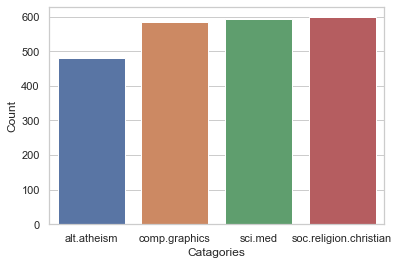

In [133]:
# ต้องการพล็อตกราก Histrogram
import matplotlib.pyplot as plt

import seaborn as sns
sns.barplot(df['Catagories'],df['Count'])
plt.show()

# Workshop 4 : ตรวจดู Bag of words

In [134]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer # ใช้ CountVectorizer

text = news.data # ข้อความ(Text) ทุกเอกสาร
cv = CountVectorizer() # กรณีไม่ตัดคำ Stop-words

#cv = CountVectorizer(stop_words='english') # กรณีตัดคำ Stop words
count_matrix = cv.fit_transform(text) # สร้างเมทริกซ์ คำ-จำนวนความถี่
cols = cv.get_feature_names()
word_matrix = count_matrix.toarray() # เปลี่ยนเป็น Array เพื่อใส่ DataFrame
#word_matrix = count_matrix.todense() # ใช้คำสั้งนี้ก็ได้
df = pd.DataFrame(word_matrix,
                 columns=cols)
df.head()


,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df.shape

(2257, 35788)

In [136]:
df[df.columns[10000:10010]].head() # ดูคอลัมน์ 10000 ถึง 10010

,counseling,counselling,counselor,count,counted,countenance,counter,counter_clockwise,counteract,counterargument
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [137]:
dfsum = df.sum(axis=0, skipna=True)
bow = dfsum.sort_values(ascending=False)[:30] #ดู 30 อันดับแรกที่สูงที่สุด
bow # bag of words

the        29825
of         17660
to         17222
and        13017
is         12343
in         11226
that       10723
it          8447
you         6157
for         5962
not         5285
this        5063
be          4898
from        4877
are         4769
edu         4675
have        4218
as          4015
on          3709
with        3655
but         3453
or          3432
if          3208
was         3020
can         2818
we          2674
there       2556
by          2548
what        2472
subject     2464
dtype: int64

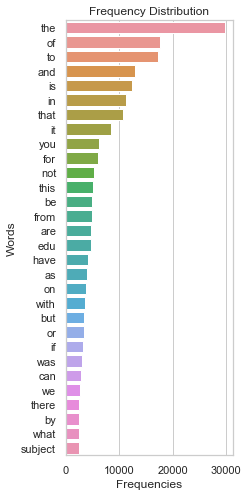

In [138]:
# พล็อต Histogram แสดงความถี่
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid') # ตั้งค่าสไตล์กราฟ
plt.subplots(figsize=(3, 8)) # กำหนดขนาดกราฟ
sns.barplot(bow.values, bow.index) # พล็อตกราฟแท่ง
plt.ylabel('Words')
plt.xlabel('Frequencies')
plt.title('Frequency Distribution')
plt.show()

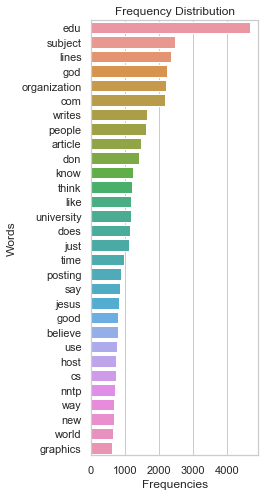

In [139]:
# ตัด Stop words แล้ว
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer # ใช้ CountVectorizer

text = news.data # ข้อความ(Text) ทุกเอกสาร
#cv = CountVectorizer() # กรณีไม่ตัดคำ Stop-words

cv = CountVectorizer(stop_words='english') # กรณีตัดคำ Stop words
count_matrix = cv.fit_transform(text) # สร้างเมทริกซ์ คำ-จำนวนความถี่
cols = cv.get_feature_names()
word_matrix1 = count_matrix.toarray() # เปลี่ยนเป็น Array เพื่อใส่ DataFrame
#word_matrix = count_matrix.todense() # ใช้คำสั้งนี้ก็ได้
df = pd.DataFrame(word_matrix1,
                 columns=cols)
df.head()
# พล็อต Histogram แสดงความถี่
import matplotlib.pyplot as plt
import seaborn as sns

dfsum = df.sum(axis=0, skipna=True)
bow = dfsum.sort_values(ascending=False)[:30] #ดู 30 อันดับแรกที่สูงที่สุด
bow # bag of words

sns.set(style='whitegrid') # ตั้งค่าสไตล์กราฟ
plt.subplots(figsize=(3, 8)) # กำหนดขนาดกราฟ
sns.barplot(bow.values, bow.index) # พล็อตกราฟแท่ง
plt.ylabel('Words')
plt.xlabel('Frequencies')
plt.title('Frequency Distribution')
plt.show()

# Workshop 5 : ตรวจดูข้อความในข้อมูล

In [140]:
print(news.data[0]) # text email ทั่วไป

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [141]:
# ต้องการดูว่าข้อความ (เอกสาร) นี้อยู่ในหมวดหมู่ใด(Target / Class) ใด
news.target[0] # อยู่หมวดแรก

1

In [142]:
# ดูชื่อหมวดหมู่
news.target_names[(news.target[0])] #comp.graphics

'comp.graphics'

# Workshop 6 : ทำการ Train and Test

In [143]:
# train_test_split
X = news.data
y = news.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)

In [144]:
# ทำการ Train and Test

import time #จับเวลา
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time() # จับเวลาเริ่มต้ย
tvec = TfidfVectorizer(stop_words='english')
X_train_tfidf = tvec.fit_transform(X_train) # X_train ทำการ Transform ให้ได้ Matrix ก่อน
X_test_tfidf = tvec.transform(X_test) # X_test ทำการ transform ให้ได้ Matrix ก่อน

model = MultinomialNB(alpha=.005) # สร้าง object
model.fit(X_train_tfidf, y_train) # ทำการ Train
end = time.time() # บันทึกเวลาจบ

print('Accuracy: {:.3f}, Time: {:.3f}' # รายงานความแม่นยำและแสดงเวลาที่ใช้ Train
     .format(model.score(X_test_tfidf, y_test),(end-start)))

X_train_tfidf.shape # 31475 ตัวอย่าง

Accuracy: 0.973, Time: 0.818


(1692, 31475)

In [145]:
# ใช้ Stop words มา train ด้วย
import time #จับเวลา
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time() # จับเวลาเริ่มต้ย
tvec = TfidfVectorizer() # เปิด stop words
X_train_tfidf = tvec.fit_transform(X_train) # X_train ทำการ Transform ให้ได้ Matrix ก่อน
X_test_tfidf = tvec.transform(X_test) # X_test ทำการ transform ให้ได้ Matrix ก่อน

model = MultinomialNB(alpha=.005) # สร้าง object
model.fit(X_train_tfidf, y_train) # ทำการ Train
end = time.time() # บันทึกเวลาจบ

print('Accuracy: {:.3f}, Time: {:.3f}' # รายงานความแม่นยำและแสดงเวลาที่ใช้ Train 
     .format(model.score(X_test_tfidf, y_test),(end-start)))
X_train_tfidf.shape # 31780 ตัวอย่าง

Accuracy: 0.975, Time: 0.916


(1692, 31780)

# Workshop 7 : การทำนาย

In [146]:
#new_docs = ['OpenGL on the GPU is fast.']  # comp.graphs
#new_docs = ['ask about health care topic.'] # 'sci.med'
#new_docs = ['God is love. loves you every body.'] #'soc.religion.christian'
new_docs_cv = tvec.transform(new_docs) # tvec จาก Workshop 6
y_pred = model.predict(new_docs_cv) # y_pred คือหมวดหมู่ ค่าตัวเลข 1 2 3 ..
news.target_names[y_pred[0]]

'soc.religion.christian'

In [148]:
# predict ทีละหลายๆตัว
new_docs = ['God is love. love you every body.',
           'OpenGL on the GPU is fast.',
           'ask about health care topic.']
new_docs_cv = tvec.transform(new_docs)
y_pred = model.predict(new_docs_cv)
# ลูปการรันโปรแกรมหลายๆรอบ
for k in y_pred:
    print(news.target_names[k])

# Workshop 8 : การใช้ Pipeline

In [156]:
#เพื่อลดขั้นตอนการทำงานใช้ Pipeline เข้าช่วย
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import time
start = time.time()

pipe1 = Pipeline([('vectorizer', TfidfVectorizer()),
                 ('classifier', MultinomialNB(alpha=0.005))])
pipe1.fit(X_train, y_train)

end = time.time()
print('Acuracy: {:.3f}, Time: {:.3f}'.format(pipe1.score(X_test, y_test),(end-start)))

Acuracy: 0.975, Time: 0.667


In [157]:
# predict ทีละหลายคำละหลายๆตัว
new_docs = ['God is love. love you every body.',
           'OpenGL on the GPU is fast.',
           'ask about health care topic.']
y_pred = pipe1.predict(new_docs) # y_pred คือหมวดหมู่ (ได้คำตอบเป็น 1 2 3)

# อ่านพร้อมกันหลายๆค่าตามlabel
for k in y_pred:
    print(news.target_names[k])

soc.religion.christian
comp.graphics
sci.med


# Workshop9 : การประเมิณ Model

[[125   0   0   6]
 [  0 160   0   0]
 [  0   5 127   0]
 [  1   1   1 139]]
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.95      0.97       131
         comp.graphics       0.96      1.00      0.98       160
               sci.med       0.99      0.96      0.98       132
soc.religion.christian       0.96      0.98      0.97       142

              accuracy                           0.98       565
             macro avg       0.98      0.97      0.97       565
          weighted avg       0.98      0.98      0.98       565



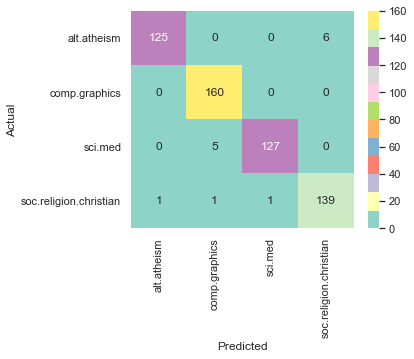

In [160]:
from sklearn.metrics import confusion_matrix # Confusion Matrix
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = pipe1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

labels = news.target_names
print(metrics.classification_report(y_test, y_pred, target_names=labels))
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Set3', fmt='d',
           xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Workshop 10 : การเตรียมชุดข้อมูลของเราเอง

In [1]:
# เตรียมไฟล์ข้อความ (Text File .txt) โดยกำหนดให้เก็บ 1 ข้อมความ 1 ไฟล์
# สร้าง Floder โดยตั้งชื่อตามหมวดหมู่ที่ต้องการ (ชื่อfloder คือ Target /Label) สามารถสร้างไว้ใต้floder อีกกี่ชั้น
# เก็บข้อความไว้ในไฟล์ชนิดข้อความ .txt (1 ไฟล์ เก็บ 1 ข้อความ ) เก็บไฟล์ไว้ในโฟลเดอร์ของแต่ละหมวดหมู่

In [3]:
# เรียกใช้ Dataset
import numpy as np
from sklearn.datasets import load_files

Data_Dir = 'dataset_NLP_eng/movies2019/' # เก็บชื่อที่อยู่ไฟล์
movies = load_files(Data_Dir, encoding='utf-8', decode_error='replace') # data
labels, counts = np.unique(movies.target, return_counts=True) # ดูชื่อไฟล์
labels_str = np.array(movies.target_names)[labels]
list(zip(labels_str, counts))

[('Action', 11),
 ('Biography', 10),
 ('Crime', 8),
 ('Drama', 10),
 ('Horror', 10),
 ('SciFi', 10)]

In [5]:
# จำนวน samples 59 labels มี features น้อยเกินไปปรับปรุงเพิ่ม
#len(movies.data) # 59
# จำนวน Target
#len(movies.target) # 59

59

In [9]:
# Data preparation
X = movies.data
y = movies.data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)

# ทำการ Train and Test

import time #จับเวลา
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time() # จับเวลาเริ่มต้ย
tvec = TfidfVectorizer(stop_words='english')
X_train_tfidf = tvec.fit_transform(X_train) # X_train ทำการ Transform ให้ได้ Matrix ก่อน
X_test_tfidf = tvec.transform(X_test) # X_test ทำการ transform ให้ได้ Matrix ก่อน

model = MultinomialNB(alpha=.005) # สร้าง object
model.fit(X_train_tfidf, y_train) # ทำการ Train
end = time.time() # บันทึกเวลาจบ

print('Accuracy: {:.3f}, Time: {:.3f}' # รายงานความแม่นยำและแสดงเวลาที่ใช้ Train
     .format(model.score(X_test_tfidf, y_test),(end-start)))

X_train_tfidf.shape # 59 ตัวอย่าง

Accuracy: 0.000, Time: 0.018


(44, 567)

In [10]:
# ประเมิน model
from sklearn.metrics import confusion_matrix # Confusion Matrix
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = model.predict(X_test) # error

cm = confusion_matrix(y_test, y_pred)
print(cm)

labels = movies.target_names
print(metrics.classification_report(y_test, y_pred, target_names=labels))
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Set3', fmt='d',
           xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=["After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe."
 'A veteran hunter helps an FBI agent investigate the murder of a young woman on a Wyoming Native American reservation.'
 'When the world is under attack from terrifying creatures who hunt their human prey by sound, 16-year old Ally Andrews (Kiernan Shipka), who lost her hearing at 13, and her family seek refuge in a remote haven.'
 'Competitive ice skater Tonya Harding rises amongst the ranks at the U.S. Figure Skating Championships, but her future in the activity is thrown into doubt when her ex-husband intervenes.'
 'A musician helps a young singer find fame as age and alcoholism send his own career into a downward spiral.'
 'When three different animals become infected with a dangerous pathogen, a primatologist and a geneticist team up to stop them from destroying Chicago.'
 'A young fugitive prince and princess must stop a villain who unknowingly threatens to destroy the world with a special dagger that enables the magic sand inside to reverse time.'
 'Dr. Louis Creed and his wife, Rachel, relocate from Boston to rural Maine with their two young children. The couple soon discover a mysterious burial ground hidden deep in the woods near their new home.'
 'A collection of animated short stories that span various genres including science fiction, fantasy, horror and comedy.'
 "The NSA's illegal surveillance techniques are leaked to the public by one of the agency's employees, Edward Snowden, in the form of thousands of classified documents distributed to the press."
 'A chronicle of the crimes of Ted Bundy from the perspective of Liz, his longtime girlfriend, who refused to believe the truth about him for years.'
 'In an unbelievable story of perseverance, free climber Tommy Caldwell and climbing partner Kevin Jorgeson attempt to scale the impossible 3000ft Dawn Wall of El Capitan.'
 'A deactivated cyborg is revived, but cannot remember anything of her past life and goes on a quest to find out who she is.'
 'An experience about the highest peaks around the world.'
 'Steven, a charismatic surgeon, is forced to make an unthinkable sacrifice after his life starts to fall apart, when the behavior of a teenage boy he has taken under his wing turns sinister.'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.